# Used Car Price Estimation

A used car sales service is developing an application to attract new customers. The application will enable users to quickly determine the market value of their used car. You have access to historical data, including technical specifications, configurations, and prices of cars. Your task is to build a model for determining the value.

The client emphasizes:

Prediction quality.

Prediction speed.

Training time.


## Exploratory Data Analysis

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_validate
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('/datasets/autos.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
display(data)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


We have 15 columns with various features such as the date of questionnaire download, body type, transmission type, power, car model, mileage, fuel type, brand, etc. The target variable is the price.

### Filling Missing Values

In [5]:
data.reset_index(drop=True, inplace=True)

In [6]:
data.isna().mean().sort_values(ascending=False)

Repaired             0.200791
VehicleType          0.105794
FuelType             0.092827
Gearbox              0.055967
Model                0.055606
DateCrawled          0.000000
Price                0.000000
RegistrationYear     0.000000
Power                0.000000
Kilometer            0.000000
RegistrationMonth    0.000000
Brand                0.000000
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

There are missing values in the following columns:

VehicleType: Body type of the vehicle (10% missing)

Gearbox: Transmission type (6% missing)

Model: Car model (6% missing)

FuelType: Fuel type (9% missing)

Repaired: Whether the car was repaired or not (20% missing)

Since these columns all impact the target variable - the car's price - directly, they cannot be removed. All these features are categorical, so one option is to replace the missing values with a common value, such as "unknown".

In [7]:
data=data.fillna('unknown')

In [8]:
data.isna().mean()

DateCrawled          0.0
Price                0.0
VehicleType          0.0
RegistrationYear     0.0
Gearbox              0.0
Power                0.0
Model                0.0
Kilometer            0.0
RegistrationMonth    0.0
FuelType             0.0
Brand                0.0
Repaired             0.0
DateCreated          0.0
NumberOfPictures     0.0
PostalCode           0.0
LastSeen             0.0
dtype: float64

### Outlier Detection

<AxesSubplot:xlabel='Kilometer'>

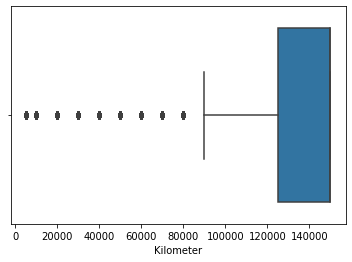

In [9]:
sns.boxplot(data['Kilometer'])

In [10]:
data['Kilometer'].describe()

count    354369.000000
mean     128211.172535
std       37905.341530
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: Kilometer, dtype: float64

<AxesSubplot:>

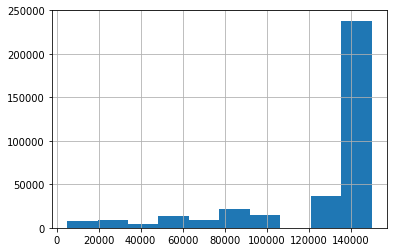

In [11]:
data['Kilometer'].hist()

There are no outliers in the mileage. Most cars have mileage ranging from 130,000 to 150,000 km, but there are also cars with lower mileage. The minimum value is 5,000 km.

<AxesSubplot:xlabel='Price'>

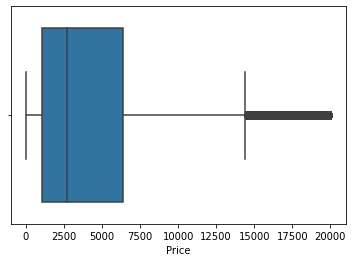

In [12]:
sns.boxplot(data['Price'])

In [13]:
data['Price'].describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: Price, dtype: float64

<AxesSubplot:>

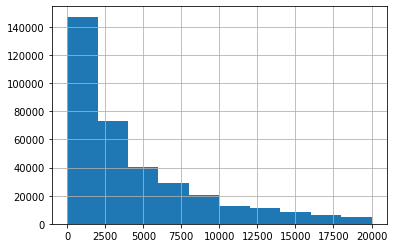

In [14]:
data['Price'].hist()

We can observe that the minimum price is 0. This is likely due to incorrectly filled data and could adversely impact the model's predictions. Let's exclude all data rowas with a price of 0 from the dataset.

In [15]:
data=data.loc[data['Price'] != 0]

In [16]:
data['Price'].describe()

count    343597.000000
mean       4555.121974
std        4515.058553
min           1.000000
25%        1200.000000
50%        2890.000000
75%        6500.000000
max       20000.000000
Name: Price, dtype: float64

<AxesSubplot:>

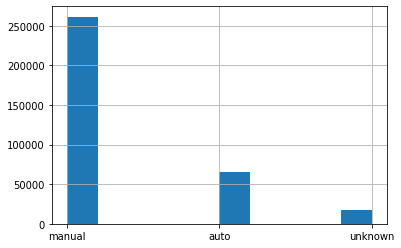

In [17]:
data['Gearbox'].hist()

<AxesSubplot:>

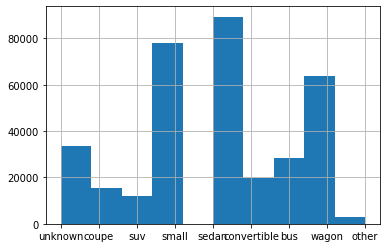

In [18]:
data['VehicleType'].hist()

The majority of listings have values like "Sedan," "Small," and "Convertible."

In [19]:
data['RegistrationYear'].describe()

count    343597.000000
mean       2004.089797
std          78.413225
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: RegistrationYear, dtype: float64

<AxesSubplot:xlabel='RegistrationYear'>

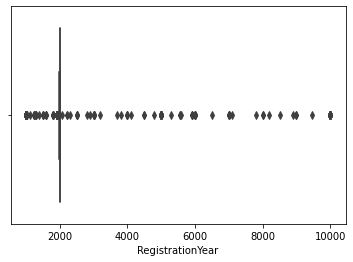

In [20]:
sns.boxplot(data['RegistrationYear'])


<AxesSubplot:>

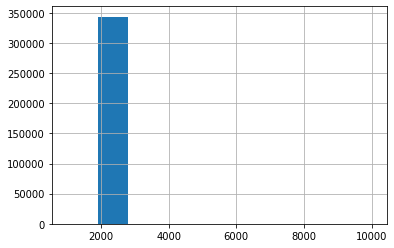

In [21]:
data['RegistrationYear'].hist()


We can see that the majority of registration year values fall within the range of 1999 (25%) to 2008 (75%). However, there are some absurd values such as 1000, 4000, 6000, and 9999. Let's filter the upper limit of the registration year based on the last seen date (LastSeen) since the registration year cannot be later than the date of the listing.


In [22]:
data['LastSeen'].describe()

count                  343597
unique                 174543
top       2016-04-06 13:45:54
freq                       16
Name: LastSeen, dtype: object

The latest listing was viewed in April 2016. Let's filter the registration year up to 2017.

In [23]:
data=data.loc[data['RegistrationYear']<2017]

In [24]:
# We will remove all cars with a registration year before 1960, as they appear to be implausible.
data=data.loc[data['RegistrationYear']>1960]

In [25]:
data['Power'].describe()

count    329342.000000
mean        111.994656
std         184.910679
min           0.000000
25%          71.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64

In [26]:
#We will remove all listings with a power value greater than 1000, as these listings are not plausible
data=data.loc[data['Power']<1000]

In [27]:
data['Model'].unique()

array(['golf', 'unknown', 'grand', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'arosa', 'other', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'one', 'fortwo',
       '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta', 'fiesta',
       'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'ka', 'a1', 'insignia',
       'combo', 'focus', 'tt', 'corsa', 'a6', 'jazz', 'omega', 'slk',
       '7er', '80', '147', '100', 'z_reihe', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'sharan', '6_reihe', 'c4', 'panda',
       'up', 'i_reihe', 'ceed', '5_reihe', 'yeti', 'octavia', 'zafira',
       'mii', 'rx_reihe', '6er', 'modus', 'fox', 'matiz', 'beetle', 'c1',
       'rio

In [28]:
data['NumberOfPictures'].unique()

array([0])

In [29]:
data['NumberOfPictures'].sum()

0

Since the column "NumberOfPictures" has a single unique value of 0, it can be safely removed as it provides no useful information.

In [30]:
data['FuelType'].unique()

array(['petrol', 'gasoline', 'unknown', 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

<AxesSubplot:>

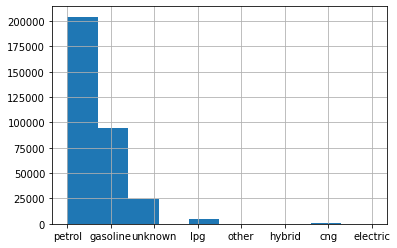

In [31]:
data['FuelType'].hist()

In [32]:
# Let's check how much data was removed after filtering out the outliers.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329078 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        329078 non-null  object
 1   Price              329078 non-null  int64 
 2   VehicleType        329078 non-null  object
 3   RegistrationYear   329078 non-null  int64 
 4   Gearbox            329078 non-null  object
 5   Power              329078 non-null  int64 
 6   Model              329078 non-null  object
 7   Kilometer          329078 non-null  int64 
 8   RegistrationMonth  329078 non-null  int64 
 9   FuelType           329078 non-null  object
 10  Brand              329078 non-null  object
 11  Repaired           329078 non-null  object
 12  DateCreated        329078 non-null  object
 13  NumberOfPictures   329078 non-null  int64 
 14  PostalCode         329078 non-null  int64 
 15  LastSeen           329078 non-null  object
dtypes: int64(7), object(

There are 329,000 records remaining out of the initial 354,000, which means we removed 7% of the data. This is not critical. We have removed outliers in the "RegistrationYear" column and implausible values in the "Price" and "Power" columns.

### Removing Uninformative Features

Let's remove the uninformative features.

In [33]:
data=data.drop([ 'PostalCode', 'DateCrawled','NumberOfPictures', 'DateCreated', 'LastSeen'], axis=1)

### Preparing Datasets for Model Training

Let's split our dataset into subsets. Since we'll be encoding categorical data using different methods, we'll create copies of the dataframe for each encoding type. For tree-based models, Ordinal Encoding is suitable, for LGBM we can use Label Encoding, and for linear models, we'll use One Hot Encoding. We will create two datasets and two sets of samples, each with different ways of encoding categorical features.

Let's check the number of unique values in each categorical column:

In [54]:

data[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']].nunique()

VehicleType      9
Gearbox          3
Model          251
FuelType         8
Brand           40
Repaired         3
dtype: int64

The "Model" column has the most values - 251 unique values. If we apply One Hot Encoding (OHE) to this column, it will add 251 columns to our dataframe, significantly increasing its size and potentially affecting the model's speed. Let's remove the "Model" column and keep only the "Brand" column, encoding all features using One Hot Encoding.

In [35]:
data_ohe = data.copy()

In [36]:
data_ohe = data_ohe.drop([ 'Model'], axis=1)

In [37]:
data_oe=data.copy()

In [38]:
data_oe=data_oe.drop(['Model'], axis=1)

In [39]:
features_oe=data_oe.drop(['Price'], axis=1)
target_oe=data_oe['Price']

In [40]:
features_ohe=data_ohe.drop(['Price'], axis=1)
target_ohe=data_ohe['Price']

In [41]:
features_oe_train, features_oe_test, target_oe_train, target_oe_test=train_test_split(features_oe, target_oe, test_size=0.25, random_state=12345)

In [42]:
features_ohe_train, features_ohe_test, target_ohe_train, target_ohe_test=train_test_split(features_ohe, target_ohe, test_size=0.25, random_state=12345)

### Categorical Feature Encoding

Since we will be trying a linear regression model, we need to represent all categorical features in numerical form - that is, encode them.

Let's encode categorical features using One Hot Encoding for the linear regression model.

In [55]:
categories = ['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'Repaired']

In [56]:
numerics = ['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']

 We create an OHE (One Hot Encoding) transformer that will apply the OHE transformation to the columns specified in the "categories" list.


In [57]:
ohe_transformer = make_column_transformer((StandardScaler(), numerics),
        (OneHotEncoder(), categories),
        remainder='passthrough')

## Model Training

### Linear Regression Model

Let's create dataframe to analyse models 

In [58]:
# dataframe to analyse models 
model_data = pd.DataFrame(columns=('model','fit_time','score_time','RMSE'))
model_data.head()

,model,fit_time,score_time,RMSE


Create pipeline

In [59]:
pipe_lr = Pipeline([('ohe_transformer', ohe_transformer),
                 ('lr', LinearRegression())])

We input our OHE transformer and linear regression model into a pipeline. In this case, during training, the pipeline will first transform the features and then pass the transformed data to the linear regression model.

In [60]:

cv_lr= cross_validate(pipe_lr, features_ohe_train, target_ohe_train, cv=5, scoring='neg_root_mean_squared_error')
fit_time = cv_lr['fit_time'].mean()
score_time = cv_lr['score_time'].mean()
test_score = abs(cv_lr['test_score'].mean())


In [61]:
lr_data = ['LinearRegression', fit_time, score_time, test_score]

#add to dataframe
model_data.loc[len(model_data)] = lr_data
model_data.head()

,model,fit_time,score_time,RMSE
0,LinearRegression,5.358202,0.210783,2834.568891


### Random Forest

In [62]:
oe_transformer = make_column_transformer((OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categories),
        remainder='passthrough')

In [63]:
pipe_rf = Pipeline([('oe_transformer', oe_transformer),
                 ('rf', RandomForestRegressor())])


We initiate the GridSearch.

In [64]:
param = {'rf__max_depth':[10,20,30],
        'rf__n_estimators':[100,200,300]}

In [ ]:
rf_grid=GridSearchCV(estimator=pipe_rf, cv=5, param_grid = param, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid=rf_grid.fit(features_oe_train, target_oe_train)

In [ ]:
results = rf_grid.cv_results_
best_index = rf_grid.best_index_


In [ ]:

fit_time = results['mean_fit_time'][best_index]
score_time = results['mean_score_time'][best_index]
RMSE = (rf_grid.best_score_*-1)


In [ ]:
rf_data = ['RandomForest', fit_time, score_time, RMSE]

model_data.loc[len(model_data)] = rf_data
model_data.head()

### LightGBM

In [ ]:
pipe_lgb= Pipeline([('oe_transformer', oe_transformer),
                 ('lgb', LGBMRegressor())])

In [ ]:
param = {'lgb__n_estimators': [100, 200, 300], 
         'lgb__max_depth':[15, 20, 30, 35],
         'lgb__learning_rate':[0.1, 0.3, 0.5, 0.7]
        }


In [ ]:
gs = GridSearchCV(estimator=pipe_lgb,param_grid=param,scoring='neg_root_mean_squared_error')


In [ ]:
lgb_grid= gs.fit(features_oe_train, target_oe_train)

In [ ]:
print(lgb_grid.best_params_, lgb_grid.best_score_)

In [ ]:

results = lgb_grid.cv_results_

best_index = lgb_grid.best_index_


fit_time = results['mean_fit_time'][best_index]
score_time = results['mean_score_time'][best_index]
RMSE = (lgb_grid.best_score_*-1)



In [ ]:
print(fit_time, score_time)

In [ ]:
lgbm_data = ['LightGBM', fit_time, score_time, RMSE]

model_data.loc[len(model_data)] = lgbm_data
model_data.head()

### Catboost

In [ ]:
data.info()

In [ ]:
data=data.drop(['Model'], axis=1)

In [ ]:
cat_features=['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'NotRepaired']

In [ ]:
numeric=['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']

In [ ]:
data[numeric] = data[numeric].astype(float)

In [ ]:
train, test = train_test_split(data,random_state=12345)

In [ ]:
features = ['VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'NotRepaired' ]

In [ ]:
target= ['Price']

### Cross-Validation

In [ ]:
from catboost import Pool
from catboost import cv

In [ ]:
train_data=Pool(data=train[features],
               label=train[target], 
               cat_features=cat_features
               )

In [ ]:
test_data=Pool(data=test[features],
               label=test[target], 
               cat_features=cat_features
               )

In [ ]:
model_params={'cat_features':cat_features,
              'loss_function':'RMSE',
              'learning_rate':0.11558,
              'random_seed': 12345,
              'verbose':100
             }

In [ ]:
cv_params={'params':model_params,
          'pool': train_data,
          'fold_count': 3,
          'shuffle':True, 
          'verbose': 100,
           'partition_random_seed':12345,
        'early_stopping_rounds':200
          }

In [ ]:
cv_data=cv(**cv_params)

At the output, cross-validation provides a DataFrame. Let's take a look at it. It contains results for each iteration - the mean value across three folds.

In [ ]:
cv_data

The small standard deviation of results indicates low variability (the result doesn't fluctuate significantly). This suggests that we have a relatively high degree of confidence in the cross-validation results.

Let's find the point where the model parameters are optimal.

In [ ]:
min_RMSE=cv_data['test-RMSE-mean'].min()

In [ ]:
min_RMSE

Now let's find that specific iteration.

In [ ]:
cv_data[cv_data['test-RMSE-mean']==min_RMSE]

The best iteration is closer to the end. Therefore, the learning rate specified in the parameters above is suitable for us, and we will use it when passing it to the model.

### GridsearchCV

In [ ]:
model_cbr = CatBoostRegressor(cat_features=cat_features)
grid_parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
cbr_grid = GridSearchCV(estimator=model_cbr, param_grid = grid_parameters, cv = 5, n_jobs=-1)
cbr_grid.fit(train[features],train[target] )

In [ ]:

results = cbr_grid.cv_results_

best_index = cbr_grid.best_index_


fit_time = results['mean_fit_time'][best_index]
score_time = results['mean_score_time'][best_index]
RMSE = (cbr_grid.best_score_*-1)


In [ ]:
catboost_data = ['CatBoost', fit_time, score_time, RMSE]

model_data.loc[len(model_data)] = catboost_data
model_data.head()

## Analysis of different models

In [ ]:
model_data = model_data.drop_duplicates()
display(model_data)
model_data.plot.bar(x='model',y='RMSE')
model_data.plot.bar(x='model',y='fit_time')

We can see that the LightGBM model has the best RMSE (1639), while the CatBoost model has a very similar RMSE (1658). However, the LightGBM model takes much longer to train. Therefore, I would choose the CatBoost model due to its comparable performance and faster training time.

## Let's make predictions using the best model and evaluate the RMSE.

In [ ]:
preds = lgb_grid.predict(test[features])

In [ ]:
RMSE = mean_squared_error(preds, test[target] , squared=False)

In [ ]:
print(RMSE )

## Conclusion


In this project, our goal was to find the best model for predicting the market price of used cars for a used car sales service application. We explored a database containing over 354,000 listings of used cars. The dataset included the following features:

Date the listing was downloaded from the database.

Body type of the car.

Year of car registration.

Transmission type.

Engine power.

Car model.

Mileage (in km).

Month of car registration.

Fuel type.

Car brand.

Whether the car was previously repaired or not.

Date the listing was created.

Number of photos of the car.

Postal code of the owner.

Date of the last user activity.

Additionally, the target variable was the car's price.


Through exploratory data analysis, data preprocessing, feature engineering, and model training, we evaluated various machine learning models including Linear Regression, LightGBM, and CatBoost. After thorough evaluation and comparison, we found that the CatBoost model had a competitive RMSE score and faster training time compared to LightGBM, making it a suitable choice for the project's requirements.

Overall, the project involved data exploration, cleaning, feature engineering, model selection, and hyperparameter tuning to build a predictive model for determining the market price of used cars in order to support the used car sales service application.







We removed features that had no significant impact on the target variable. These features include postal code, number of photos (as the entire column was empty), date the listing was downloaded from the database, date the listing was created, and date of the last user activity.

Prior to that, we filtered and removed anomalies in certain columns. For instance, we filtered the upper limit of the "Registration Year" based on the last seen date (LastSeen) since the registration year cannot be later than the date of the listing. We also removed all listings with a price of 0 and power values exceeding 1000 horsepower, as they were implausible.

Additionally, we filled missing values and encoded categorical features. For the Linear Regression model, we used One Hot Encoding (OHE) encoding. For RandomForest and LightGBM models, we used Ordinal Encoding (OE), and for the CatBoost model, we used the built-in encoding method.

When using OHE encoding, we had to remove the "Model" column since it contained 251 unique model values. Applying OHE to this column would significantly inflate our dataset, adding 251 columns. This would potentially overwhelm our models. Therefore, we removed the "Model" column while keeping the "Brand" column, which retained the predictive power of our model.

Next, we trained four types of models - Linear Regression, Random Forest, LightGBM, and CatBoost. We found the optimal parameters using grid search and cross-validation. The training results of the models are presented in the table below:

In [ ]:
model_data = model_data.drop_duplicates()
display(model_data)
model_data.plot.bar(x='model',y='RMSE')
model_data.plot.bar(x='model',y='fit_time')

We can observe that the LightGBM model has the best RMSE (1639), while the CatBoost model has a very similar RMSE (1658). However, the LightGBM model takes much longer to train. My choice would lean towards the LightGBM model due to its superior RMSE, even though it has a longer training time.